In [2]:
library(readr) # for importing the datafile
library(afex) # for the anova
library(tidyverse) # for restructuring it
library(rstatix) # for testing assumptions
library(ggpubr) # for graphical test of normality
library(emmeans) # for post-hoc tests


Loading required package: lme4

Loading required package: Matrix

************
Welcome to afex. For support visit: http://afex.singmann.science/

- Functions for ANOVAs: aov_car(), aov_ez(), and aov_4()
- Methods for calculating p-values with mixed(): 'S', 'KR', 'LRT', and 'PB'
- 'afex_aov' and 'mixed' objects can be passed to emmeans() for follow-up tests
- NEWS: emmeans() for ANOVA models now uses model = 'multivariate' as default.
- Get and set global package options with: afex_options()
- Set orthogonal sum-to-zero contrasts globally: set_sum_contrasts()
- For example analyses see: browseVignettes("afex")
************


Attaching package: ‘afex’


The following object is masked from ‘package:lme4’:

    lmer


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ dplyr   1.0.7
✔ tibble  3.1.6     ✔ stringr 1.4.0
✔ tidyr   1.2.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyvers

In [3]:
d_long <- read.csv("eda_base_run.tsv", sep="\t")
names(d_long)[names(d_long) == "eda"] 
d_long


[1] "eda"

prob_id,time,eda,run,phase,index,repetition,trial_type,condition,age,sex,group
<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<chr>,<chr>,<int>,<chr>,<chr>
2,0,-0.90,1,-1,0,0,pause,pause,26,F,Musik
3,0,0.33,1,-1,0,0,pause,pause,23,M,Musik
5,0,-0.29,1,-1,0,0,pause,pause,25,M,Musik
9,0,-0.73,1,-1,0,0,pause,pause,30,M,Sound
11,0,0.81,1,-1,0,0,pause,pause,23,F,Musik
12,0,-2.33,1,-1,0,0,pause,pause,21,F,Sound
13,0,3.95,1,-1,0,0,pause,pause,22,F,Sound
14,0,0.91,1,-1,0,0,pause,pause,23,F,Musik
15,0,-3.90,1,-1,0,0,pause,pause,23,F,Sound


In [4]:
d_long$type <- as.factor(d_long$trial_type)
d_long$condition <- as.factor(d_long$condition)
d_long$group <- as.factor(d_long$group)
d_long$sex <- as.factor(d_long$sex)
d_long$eda <- as.numeric(d_long$eda)
d_long$time<- as.factor(paste(d_long$run, d_long$repetition, sep = "_"))

# bad data structure. See what happens if I eliminate all rows that are "pause" in "condition"

d_long_new <- d_long[d_long$condition != "pause", ] 

In [5]:
summary(d_long_new)

    prob_id       time           eda               run          phase     
 Min.   : 2.00   1_0:   0   Min.   :-5.6400   Min.   :1.0   Min.   :0.00  
 1st Qu.:12.00   1_1:5192   1st Qu.:-0.7100   1st Qu.:1.0   1st Qu.:1.75  
 Median :18.00   1_2:5192   Median : 0.0000   Median :1.5   Median :3.50  
 Mean   :17.32   2_0:   0   Mean   : 0.1054   Mean   :1.5   Mean   :3.50  
 3rd Qu.:24.00   2_1:5192   3rd Qu.: 0.7200   3rd Qu.:2.0   3rd Qu.:5.25  
 Max.   :29.00   2_2:5192   Max.   :10.0400   Max.   :2.0   Max.   :7.00  
     index         repetition   trial_type           condition    
 Min.   : 0.00   Min.   :1.0   Length:20768       math    :10384  
 1st Qu.: 3.75   1st Qu.:1.0   Class :character   pause   :    0  
 Median : 7.50   Median :1.5   Mode  :character   rotation:10384  
 Mean   : 7.50   Mean   :1.5                                      
 3rd Qu.:11.25   3rd Qu.:2.0                                      
 Max.   :15.00   Max.   :2.0                                      
      

In [6]:
# our four factors are:
# music vs sound (d_long$group, btw)
# stress vs relaxation (d_long$type, wth)
# maths vs rotation (d_long$condition, wth)
# run + repetition within run (d_long$time, wth)
# 
# covariates are:
# age (d_long$age, btw)
# gender (d_long$sex, btw)

Test assumptions

In [7]:
# 1) normality

d_long_new %>%
  group_by(time, type, condition, group) %>%
  shapiro_test(eda)

d_long_new %>%
  group_by(time, type, condition, group) %>%
  summary()

time,condition,group,type,variable,statistic,p
<fct>,<fct>,<fct>,<fct>,<chr>,<dbl>,<dbl>
1_1,math,Musik,relax,eda,0.9156311,3.041952e-20
1_1,math,Sound,relax,eda,0.9547673,1.097181e-11
1_1,rotation,Musik,relax,eda,0.9163329,3.674951e-20
1_1,rotation,Sound,relax,eda,0.9753427,8.475009e-08
1_1,math,Musik,stress,eda,0.7762312,4.558507e-31
1_1,math,Sound,stress,eda,0.9479478,1.025707e-12
1_1,rotation,Musik,stress,eda,0.8170780,1.250052e-28
1_1,rotation,Sound,stress,eda,0.8997494,3.629487e-18
1_2,math,Musik,relax,eda,0.8739763,2.126077e-24


    prob_id       time           eda               run          phase     
 Min.   : 2.00   1_0:   0   Min.   :-5.6400   Min.   :1.0   Min.   :0.00  
 1st Qu.:12.00   1_1:5192   1st Qu.:-0.7100   1st Qu.:1.0   1st Qu.:1.75  
 Median :18.00   1_2:5192   Median : 0.0000   Median :1.5   Median :3.50  
 Mean   :17.32   2_0:   0   Mean   : 0.1054   Mean   :1.5   Mean   :3.50  
 3rd Qu.:24.00   2_1:5192   3rd Qu.: 0.7200   3rd Qu.:2.0   3rd Qu.:5.25  
 Max.   :29.00   2_2:5192   Max.   :10.0400   Max.   :2.0   Max.   :7.00  
     index         repetition   trial_type           condition    
 Min.   : 0.00   Min.   :1.0   Length:20768       math    :10384  
 1st Qu.: 3.75   1st Qu.:1.0   Class :character   pause   :    0  
 Median : 7.50   Median :1.5   Mode  :character   rotation:10384  
 Mean   : 7.50   Mean   :1.5                                      
 3rd Qu.:11.25   3rd Qu.:2.0                                      
 Max.   :15.00   Max.   :2.0                                      
      

In [8]:
# 2) homogeneity of variance (only for between-subject factors)

d_long %>%
  group_by(run, phase) %>%
  levene_test(eda ~ group)
# not given, we need to correct the results.

run,phase,df1,df2,statistic,p
<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,-1,1,5527,142.9220509,1.535607e-32
1,0,1,1296,72.7622751,4.022316e-17
1,1,1,1296,96.1988557,5.902548e-22
1,2,1,1296,5.8716663,1.552274e-02
1,3,1,1296,125.6145843,6.830110e-28
1,4,1,1296,30.5084119,4.012814e-08
1,5,1,1296,1.5872228,2.079502e-01
1,6,1,1296,0.7907513,3.740381e-01
1,7,1,1296,80.9465208,8.044326e-19


In [9]:
# 3) assumption of sphericity (only for within-subject factors)

# will be checked and corrected for automatically when computing the ANOVA. Look at that then.

Define model 

In [10]:
#model1 <- aov_ez("prob_id", # Variable/column defining your participants
#       "eda", # dv
#       d_long, # name of your dataframe
#       between = c("group", "sex"), # if sex was also included, this would be c('group', 'sex')
#       within = c("time", "condition", "type"), 
#       include_aov = TRUE)
#
#
#model1
#summary(model1)

In [11]:
# with pause excluded

model1 <- aov_ez("prob_id", # Variable/column defining your participants
                 "eda", # dv
                 d_long_new, # name of your dataframe
                 between = c("group", "sex"), # if sex was also included, this would be c('group', 'sex')
                 within = c("time", "condition", "type"), 
                 include_aov = TRUE, na.rm=TRUE)
model1
summary(model1)


# we see that the assumption of sphericity was corrected for using the Greenhouse-Geisser correction
# we also see that we have an effect for time
# and for time*condition*type

Warning message:
“More than one observation per cell, aggregating the data using mean (i.e, fun_aggregate = mean)!”
Contrasts set to contr.sum for the following variables: group, sex



Anova Table (Type 3 tests)

Response: eda
                          Effect          df  MSE         F   ges p.value
1                          group       1, 18 0.20      0.24 <.001    .631
2                            sex       1, 18 0.20      0.10 <.001    .758
3                      group:sex       1, 18 0.20      0.71 <.001    .411
4                           time 1.65, 29.63 6.56    4.10 *  .093    .034
5                     group:time 1.65, 29.63 6.56      1.21  .029    .304
6                       sex:time 1.65, 29.63 6.56      0.15  .004    .819
7                 group:sex:time 1.65, 29.63 6.56      0.58  .014    .532
8                      condition       1, 18 0.75      0.36 <.001    .554
9                group:condition       1, 18 0.75      0.44 <.001    .514
10                 sex:condition       1, 18 0.75      0.79  .001    .385
11           group:sex:condition       1, 18 0.75      1.44  .002    .246
12                          type       1, 18 3.48 26.76 ***  .177   <.


Univariate Type III Repeated-Measures ANOVA Assuming Sphericity

                              Sum Sq num Df Error SS den Df F value    Pr(>F)
(Intercept)                    3.948      1    3.638     18 19.5329 0.0003308
group                          0.048      1    3.638     18  0.2385 0.6311983
sex                            0.020      1    3.638     18  0.0979 0.7579117
group:sex                      0.143      1    3.638     18  0.7073 0.4113881
time                          44.254      3  194.229     54  4.1012 0.0107710
group:time                    13.088      3  194.229     54  1.2129 0.3138951
sex:time                       1.646      3  194.229     54  0.1525 0.9276099
group:sex:time                 6.311      3  194.229     54  0.5848 0.6275512
condition                      0.273      1   13.486     18  0.3640 0.5538226
group:condition                0.332      1   13.486     18  0.4429 0.5141435
sex:condition                  0.594      1   13.486     18  0.7924 0.385125

In [12]:
model1$anova_table

,num Df,den Df,MSE,F,ges,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
group,1.000000,18.00000,0.2021313,0.238485410,1.115987e-04,6.311983e-01
sex,1.000000,18.00000,0.2021313,0.097941011,4.583428e-05,7.579117e-01
group:sex,1.000000,18.00000,0.2021313,0.707260349,3.308883e-04,4.113881e-01
time,1.646094,29.62969,6.5552285,4.101174503,9.293929e-02,3.354813e-02
group:time,1.646094,29.62969,6.5552285,1.212874355,2.941074e-02,3.044451e-01
sex:time,1.646094,29.62969,6.5552285,0.152546048,3.796677e-03,8.186475e-01
group:sex:time,1.646094,29.62969,6.5552285,0.584821928,1.440054e-02,5.316331e-01
condition,1.000000,18.00000,0.7492330,0.363995609,6.310318e-04,5.538226e-01
group:condition,1.000000,18.00000,0.7492330,0.442944328,7.677941e-04,5.141435e-01


# post hoc tests:

In [13]:
m1_ph <- emmeans(model1, "type") # defining here which variables plus their interaction I would like to include in my posthoc-Tests
m1_ph
pairs(m1_ph) # gives you a massive table with all pair comparisons between the two significant factors, with p-values already corrected for multiple testing

# to combine pairs of factor levels define contrasts:
# e.g. test phases -1 to 3 against phases 4 to 7, but define that for each of the runs

 type   emmean     SE df lower.CL upper.CL
 relax  -0.417 0.0844 18   -0.595   -0.240
 stress  0.634 0.1213 18    0.379    0.889

Results are averaged over the levels of: group, sex, condition, time 
Confidence level used: 0.95 

 contrast       estimate    SE df t.ratio p.value
 relax - stress    -1.05 0.203 18  -5.173  0.0001

Results are averaged over the levels of: group, sex, condition, time 

In [14]:
m2_ph <- emmeans(model1, "time") # defining here which variables plus their interaction I would like to include in my posthoc-Tests
m2_ph
pairs(m2_ph) # gives you a massive table with all pair comparisons between the two significant factors, with p-values already corrected for multiple testing

# to combine pairs of factor levels define contrasts:
# e.g. test phases -1 to 3 against phases 4 to 7, but define that for each of the runs

 time emmean    SE df lower.CL upper.CL
 X1_1  0.491 0.212 18   0.0452   0.9365
 X1_2 -0.261 0.182 18  -0.6434   0.1218
 X2_1  0.450 0.175 18   0.0819   0.8173
 X2_2 -0.247 0.147 18  -0.5560   0.0625

Results are averaged over the levels of: group, sex, type, condition 
Confidence level used: 0.95 

 contrast    estimate    SE df t.ratio p.value
 X1_1 - X1_2   0.7517 0.391 18   1.920  0.2548
 X1_1 - X2_1   0.0413 0.199 18   0.207  0.9967
 X1_1 - X2_2   0.7377 0.301 18   2.452  0.1027
 X1_2 - X2_1  -0.7104 0.304 18  -2.339  0.1261
 X1_2 - X2_2  -0.0140 0.186 18  -0.075  0.9998
 X2_1 - X2_2   0.6964 0.320 18   2.179  0.1669

Results are averaged over the levels of: group, sex, type, condition 
P value adjustment: tukey method for comparing a family of 4 estimates 

In [15]:
m3_ph <- emmeans(model1, "group", "time") # defining here which variables plus their interaction I would like to include in my posthoc-Tests
m3_ph
pairs(m3_ph) # gives you a massive table with all pair comparisons between the two significant factors, with p-values already corrected for multiple testing

# to combine pairs of factor levels define contrasts:
# e.g. test phases -1 to 3 against phases 4 to 7, but define that for each of the runs

time = X1_1:
 group  emmean    SE df lower.CL upper.CL
 Musik  0.7503 0.271 18   0.1813   1.3193
 Sound  0.2315 0.327 18  -0.4546   0.9175

time = X1_2:
 group  emmean    SE df lower.CL upper.CL
 Musik -0.5580 0.232 18  -1.0465  -0.0695
 Sound  0.0364 0.280 18  -0.5525   0.6254

time = X2_1:
 group  emmean    SE df lower.CL upper.CL
 Musik  0.4343 0.223 18  -0.0351   0.9038
 Sound  0.4649 0.269 18  -0.1011   1.0310

time = X2_2:
 group  emmean    SE df lower.CL upper.CL
 Musik -0.2415 0.188 18  -0.6364   0.1534
 Sound -0.2521 0.227 18  -0.7282   0.2240

Results are averaged over the levels of: sex, type, condition 
Confidence level used: 0.95 

time = X1_1:
 contrast      estimate    SE df t.ratio p.value
 Musik - Sound   0.5188 0.424 18   1.223  0.2371

time = X1_2:
 contrast      estimate    SE df t.ratio p.value
 Musik - Sound  -0.5944 0.364 18  -1.632  0.1200

time = X2_1:
 contrast      estimate    SE df t.ratio p.value
 Musik - Sound  -0.0306 0.350 18  -0.088  0.9312

time = X2_2:
 contrast      estimate    SE df t.ratio p.value
 Musik - Sound   0.0106 0.294 18   0.036  0.9717

Results are averaged over the levels of: sex, type, condition 

In [16]:
m4_ph <- emmeans(model1, "condition", "type") # defining here which variables plus their interaction I would like to include in my posthoc-Tests
m4_ph
pairs(m4_ph) # gives you a massive table with all pair comparisons between the two significant factors, with p-values already corrected for multiple testing

# to combine pairs of factor levels define contrasts:
# e.g. test phases -1 to 3 against phases 4 to 7, but define that for each of the runs

type = relax:
 condition  emmean     SE df lower.CL upper.CL
 math      -0.7419 0.1430 18   -1.042   -0.441
 rotation  -0.0928 0.0955 18   -0.293    0.108

type = stress:
 condition  emmean     SE df lower.CL upper.CL
 math       0.9015 0.1824 18    0.518    1.285
 rotation   0.3662 0.1414 18    0.069    0.663

Results are averaged over the levels of: group, sex, time 
Confidence level used: 0.95 

type = relax:
 contrast        estimate    SE df t.ratio p.value
 math - rotation   -0.649 0.175 18  -3.708  0.0016

type = stress:
 contrast        estimate    SE df t.ratio p.value
 math - rotation    0.535 0.218 18   2.452  0.0246

Results are averaged over the levels of: group, sex, time 

In [23]:
c1 <- list(run1vsrun2 = c(1, 1, -1, -1), 
           run1_wdh = c(1, -1, 1, -1)
        # this vector gives each line in the object 'm1_ph' a weight
          )

# if several contrasts are defined, these go into a list of vectors and each get their own name.
  
contrast(m2_ph, c1, adjust = "holm") # here we define how to adjust the alpha-level, specified here is the Bonferroni-Holm correction, 
                                     # which is less strict than the Bonferroni correction

# and we see: there is a difference, t(20) = 3.222, p = 0.0043

 contrast   estimate     SE df t.ratio p.value
 run1vsrun2   0.0272 0.0379 18   0.718  0.4818
 run1_wdh     1.4481 0.6035 18   2.400  0.0549

Results are averaged over the levels of: group, sex, type, condition 
P value adjustment: holm method for 2 tests 

plots

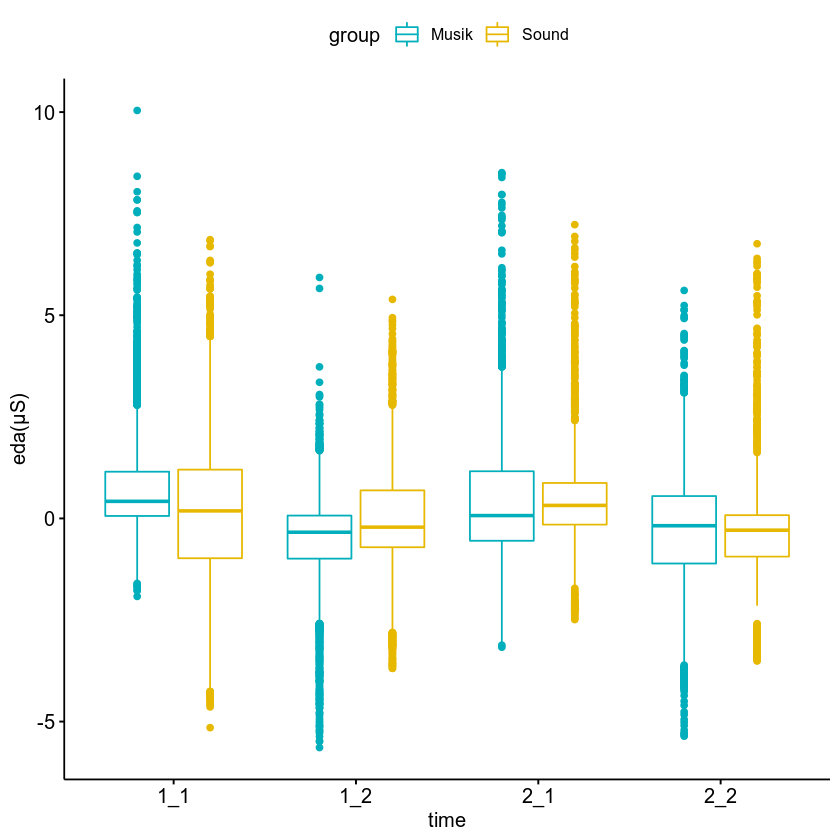

In [18]:
p_groupxtime1 <- ggboxplot(
  d_long_new, x = "time", y = "eda" ,ylab= "eda(μS)", 
  color = "group", palette = c("#00AFBB", "#E7B800")
)
p_groupxtime1

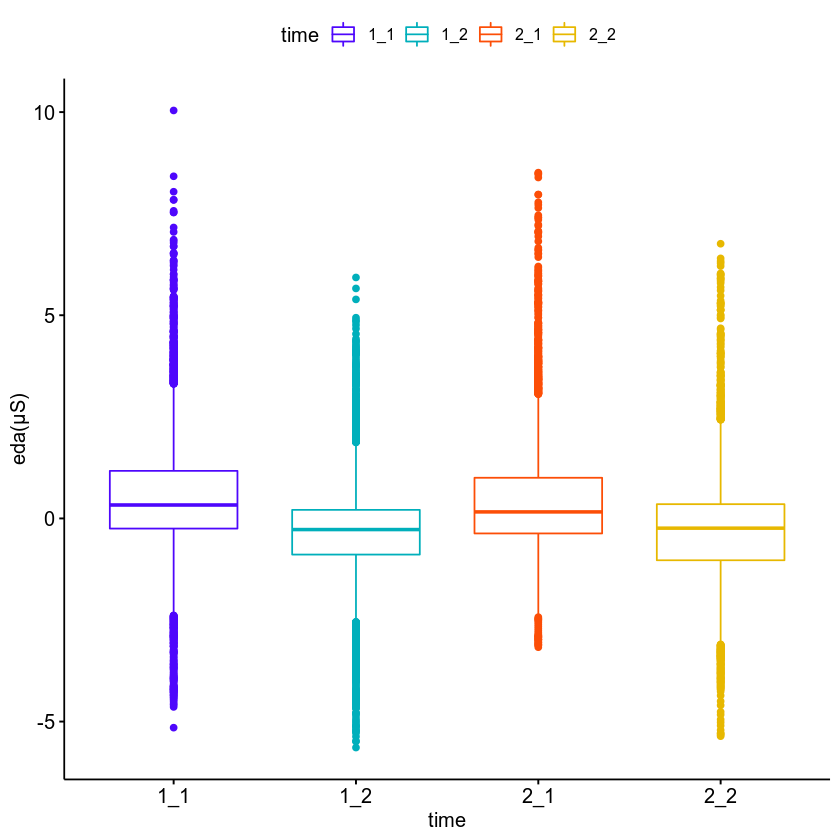

In [19]:
p_groupxtime2 <- ggboxplot(
  d_long_new, x = "time", y = "eda", ylab= "eda(μS)", 
  palette = c("#4e07fc","#00AFBB", "#FC4E07", "#E7B800" ), color = "time", shape = "time"
)
p_groupxtime2


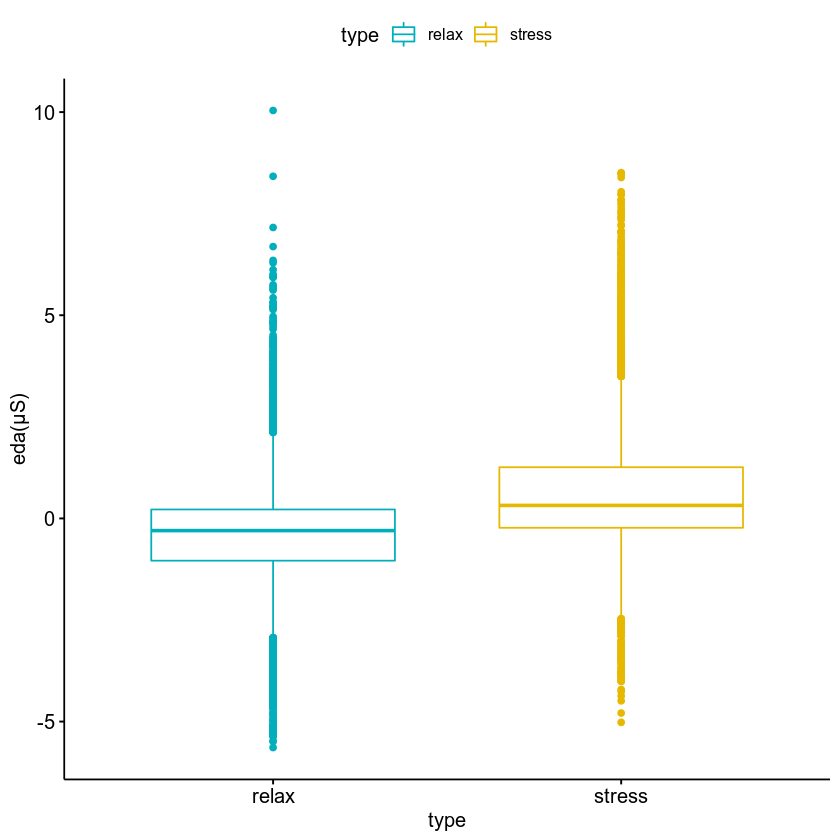

In [20]:
p_groupxtime3 <- ggboxplot(
  d_long_new, x = "type", y = "eda", ylab= "eda(μS)", 
  palette = c("#00AFBB", "#E7B800"), color = "type", shape = "type"
)
p_groupxtime3

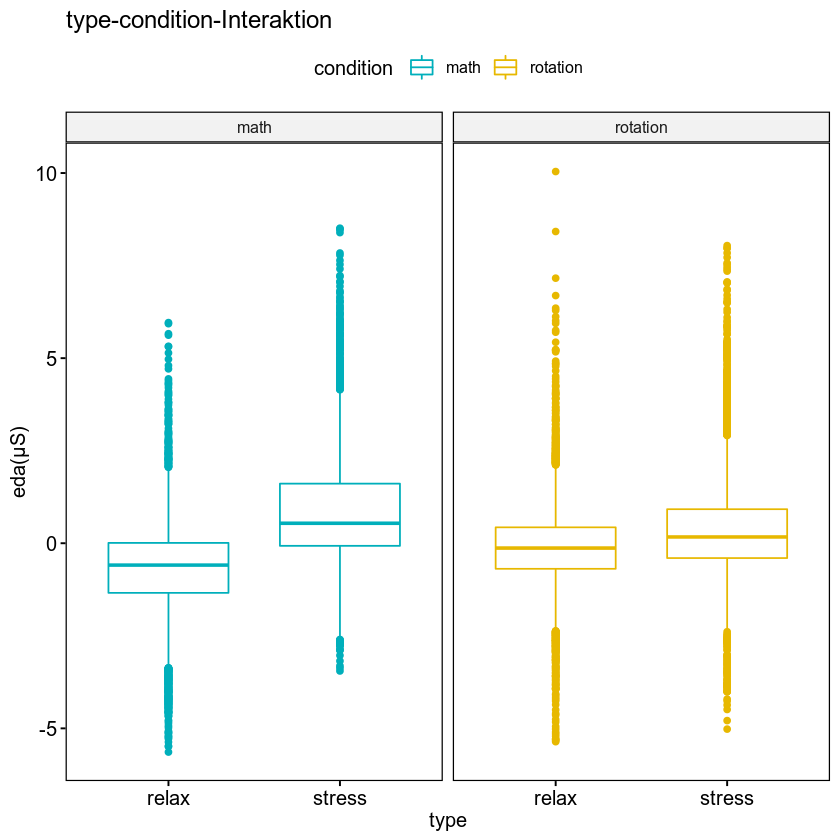

In [21]:
p_groupxtime4  <- ggboxplot(
  d_long_new, x = "type", y = "eda", facet.by = "condition", ylab= "eda(μS)", 
  color = "condition", palette = c("#00AFBB", "#E7B800"), title = "type-condition-Interaktion",
)
p_groupxtime4

In [22]:
# PNG device
png("plot1.png")
plot(p_groupxtime1)
dev.off()

png("plot2.png")
plot(p_groupxtime2)
dev.off()

png("plot3.png")
plot(p_groupxtime3)
dev.off()

png("plot4.png")
plot(p_groupxtime4)
dev.off()

png 
  2

png 
  2

png 
  2

png 
  2